In [1]:
#Let's get to work on the dataset (Data cleaning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Customer.csv")
df.head()

,Customer ID,Age,Gender,Location,Frequency,Amount Spent,Subscription
0,1,28,Male,New York,10,500,Yes
1,2,35,Female,Los Angeles,5,250,No
2,3,42,Male,Chicago,8,400,Yes
3,4,22,Female,San Francisco,3,150,No
4,5,30,Male,Houston,6,300,Yes


In [3]:
# Display the shape of the dataset.
df.shape

(100, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer ID   100 non-null    int64 
 1   Age           100 non-null    int64 
 2   Gender        100 non-null    object
 3   Location      100 non-null    object
 4   Frequency     100 non-null    int64 
 5   Amount Spent  100 non-null    int64 
 6   Subscription  100 non-null    object
dtypes: int64(4), object(3)
memory usage: 5.6+ KB


In [5]:
# Display na or nan values. dropna isnull fillna
df.isnull().sum()

Customer ID     0
Age             0
Gender          0
Location        0
Frequency       0
Amount Spent    0
Subscription    0
dtype: int64

In [6]:
# Display descriptive statistics.
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer ID,100.0,NaN,NaN,NaN,50.5,29.011492,1.0,25.75,50.5,75.25,100.0
Age,100.0,NaN,NaN,NaN,35.25,9.023398,21.0,28.0,34.0,42.0,53.0
Gender,100,2,Male,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,100,51,Kansas City,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frequency,100.0,NaN,NaN,NaN,6.46,2.861871,1.0,4.0,6.0,9.0,12.0
Amount Spent,100.0,NaN,NaN,NaN,323.0,143.093527,50.0,200.0,300.0,450.0,600.0
Subscription,100,2,Yes,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\Rangoli\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rangoli\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rangoli\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rangoli\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categor

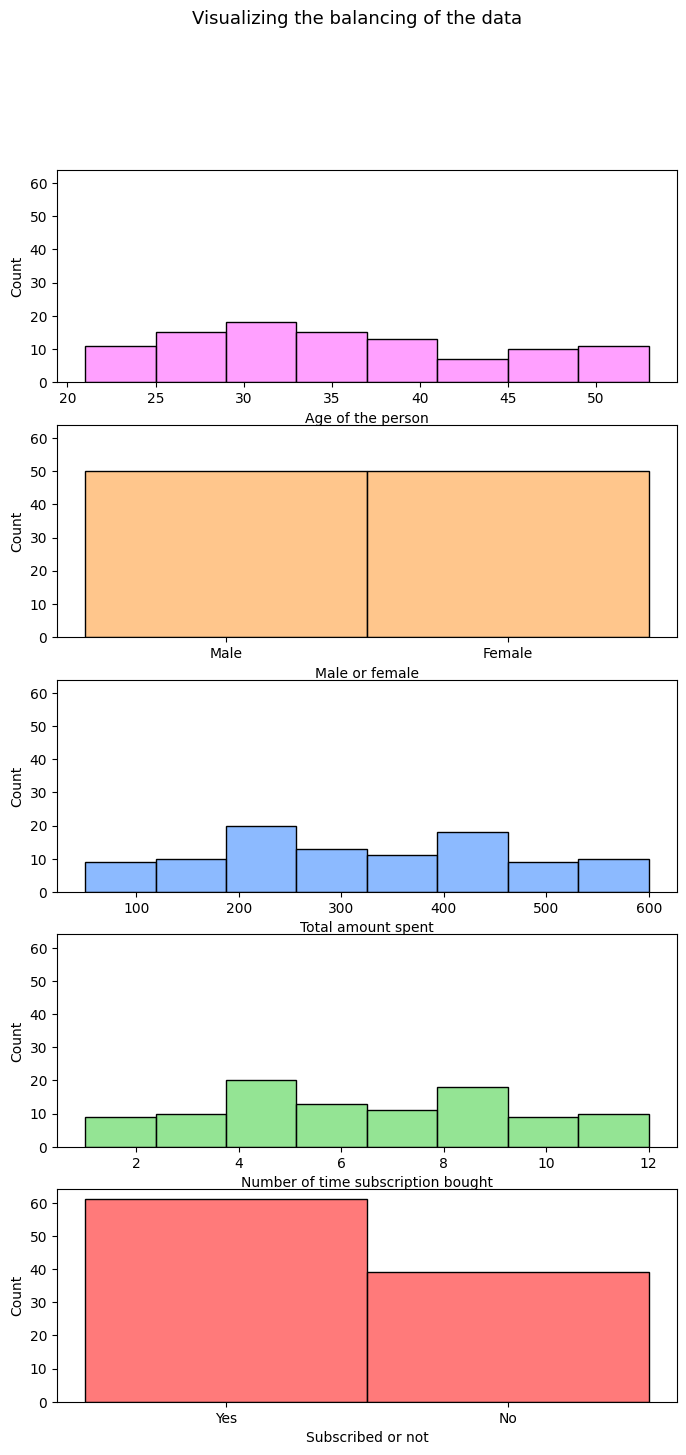

In [7]:
fig, (ax1, ax2, ax3, ax4, ax5)  = plt.subplots(5, sharey= True)

def histogram(col_name, c, data, x_label, axes):
    
    sns.histplot(x= col_name, data= df, ax= axes, color= c)
    axes.set_xlabel(x_label)
    axes.set_ylabel('Count')
    
    
histogram(col_name= "Age", c= "#ff80ff", x_label= "Age of the person", axes = ax1, data= df)
histogram(col_name= "Gender", c= "#ffb366", x_label= "Male or female", axes = ax2, data= df)
histogram(col_name= "Amount Spent", c= "#66a3ff", x_label= "Total amount spent", axes = ax3, data= df)
histogram(col_name= "Frequency", c= "#70db70", x_label= "Number of time subscription bought", axes = ax4, data= df)
histogram(col_name= "Subscription", c= "#ff4d4d", x_label= "Subscribed or not", axes = ax5, data= df)

fig.set_size_inches(8,16)
fig.set_dpi(100)
fig.suptitle("Visualizing the balancing of the data", fontsize= 13)

plt.show()

In [8]:
# Display value count of target variable.
df['Subscription'].value_counts()

Subscription
Yes    61
No     39
Name: count, dtype: int64

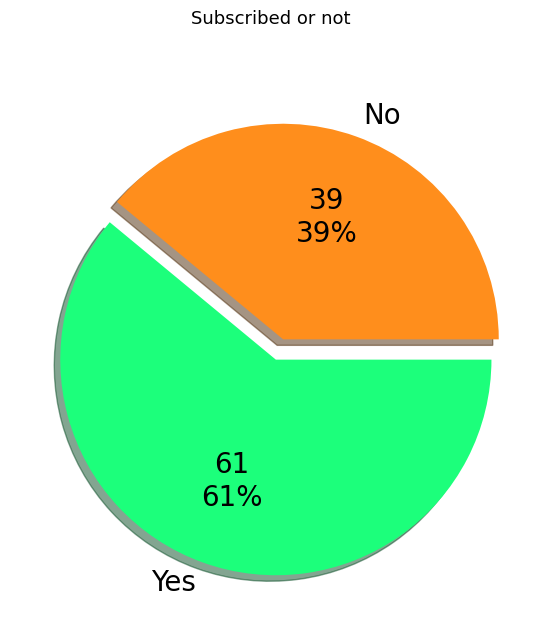

In [9]:
theme_colors = ["#ff8e1c", "#1cff7b"]
font = 13
fig, ax = plt.subplots(ncols=1, figsize=(7, 7))

spaces = (0.05, 0.05)
label_function = lambda val:  f'{val / 100 * len(df):.0f}\n{val:.0f}%'


df.groupby("Subscription").size().plot(kind= "pie", autopct=label_function,
                                           textprops={'fontsize': 20},
                                           ax=ax, colors= theme_colors, ylabel= "",
                                           shadow= True, explode= spaces)

fig.suptitle("Subscribed or not", fontsize= font)
plt.show()

In [10]:
df_cat=df.select_dtypes(object)

In [11]:
df_num=df.select_dtypes(["int64", "float64"])

In [12]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()

In [14]:
for col in df_cat:
    le=LabelEncoder()
    df_cat[col] =le.fit_transform(df_cat[col])
    df.drop(col, axis=1, inplace=True)
    df[col]=df_cat[col]

In [15]:
df

,Customer ID,Age,Frequency,Amount Spent,Gender,Location,Subscription
0,1,28,10,500,1,31,1
1,2,35,5,250,0,23,0
2,3,42,8,400,1,8,1
3,4,22,3,150,0,45,0
4,5,30,6,300,1,18,1
...,...,...,...,...,...,...,...
95,96,44,11,550,0,12,1
96,97,36,6,300,1,21,1
97,98,21,3,150,0,23,0
98,99,34,9,450,1,8,1


<Axes: >

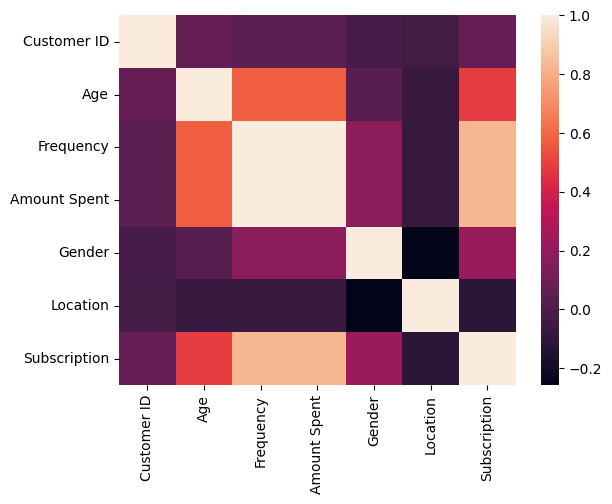

In [16]:
#Using a heatmap to visualise a confusion matrix, time-series movements, temperature changes, correlation matrix and SHAP interaction values.

sns.heatmap(df.corr())

In [17]:
# Define X and y. test and train data
y = df['Subscription']
X = df.drop(['Subscription'], axis=1)

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def model_report(y_true, y_pred):
    
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    print("precision: {:4f}\nrecall: {}\nf1-score: {:4f}\nloss: {:4f}\naccuracy: {:4f}".
          format(pre, rec, f1, loss, acc))

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

In [21]:
knn = KNeighborsClassifier(n_neighbors= 25, algorithm= "kd_tree")
random_forest = RandomForestClassifier(max_depth= 3, criterion= "gini")
desision_tree = DecisionTreeClassifier(max_depth= 2, criterion= "entropy")
gussian_nayive = GaussianNB()
regressior = LogisticRegression()

models = {"KNN" : knn, "Random forest": random_forest,
          "Desision tree" : desision_tree, "Gussian nayive": gussian_nayive,
          "Logistic regressior" : regressior, "SVM" : SVC()}

print("*"* 50, "Classic models performance", "*" * 50, "\n")
for mode_name, model in models.items():

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"{mode_name}: ")
    model_report(y_test, y_pred)
    print("=" * 25 + "\n")

************************************************** Classic models performance ************************************************** 

KNN: 
precision: 1.000000
recall: 1.0
f1-score: 1.000000
loss: 0.000000
accuracy: 1.000000

Random forest: 
precision: 1.000000
recall: 1.0
f1-score: 1.000000
loss: 0.000000
accuracy: 1.000000

Desision tree: 
precision: 1.000000
recall: 1.0
f1-score: 1.000000
loss: 0.000000
accuracy: 1.000000

Gussian nayive: 
precision: 1.000000
recall: 1.0
f1-score: 1.000000
loss: 0.000000
accuracy: 1.000000

Logistic regressior: 
precision: 1.000000
recall: 1.0
f1-score: 1.000000
loss: 0.000000
accuracy: 1.000000

SVM: 
precision: 1.000000
recall: 1.0
f1-score: 1.000000
loss: 0.000000
accuracy: 1.000000

